
## Import những thư viện cần thiết


In [5]:
import pandas as pd # thư viện làm việc với dữ liệu dạng bảng
import numpy as np # thư viện tối ưu hóa tính toán trên mảng
import matplotlib.pyplot as plt # thư viện vẽ biểu đồ
import seaborn as sns # thư viện vẽ biểu đồ 
import math # thư viện toán có sẵn
from sklearn.model_selection import train_test_split # hàm chia dữ liệu
from sklearn.linear_model import LinearRegression # mô hình hồi quy tuyến tính
import re # Package hỗ trợ dùng regex
from collections import Counter
from sklearn.ensemble import RandomForestRegressor #Mô hình RandomForest cho hồi quy.


#**Data Understanding**

In [6]:
# Load dữ liệu lên để sử dụng
df = pd.read_csv('euro_it_salary_2020.csv', index_col=0)
df

,Age,Gender,TotYrsOfExp,MainTech,AnualSalary
0,26.0,Male,5,TypeScript,75000.0
1,26.0,Male,7,Ruby,82000.0
2,29.0,Male,12,Javascript / Typescript,100000.0
3,28.0,Male,4,Javascript,NaN
4,37.0,Male,17,C# .NET,62000.0
...,...,...,...,...,...
1248,31.0,Male,9,Java,70000.0
1249,33.0,Male,10,consumer analysis,48000.0
1250,39.0,Male,15,PHP,90000.0
1251,26.0,Male,7,JavaScript,33800.0


In [7]:
# Xem ngẫu nhiên n dòng dữ liệu
df.sample(10)

,Age,Gender,TotYrsOfExp,MainTech,AnualSalary
1225,24.0,Male,5,TypeScript,65000.0
737,25.0,Male,8,Clojure,NaN
453,23.0,Male,5,Javascript,NaN
45,48.0,Male,25,Java,75000.0
427,32.0,Female,7,Kotlin,55000.0
759,29.0,Male,6,Swift,NaN
462,34.0,Male,13,Kotlin,NaN
622,35.0,Male,15,C,63000.0
487,42.0,Male,17,Go,73000.0
524,29.0,Female,9,Java,60000.0


In [8]:
# Kích thước dữ liệu
df.shape

(1253, 5)

In [9]:
# Kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1252
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1226 non-null   float64
 1   Gender       1243 non-null   object 
 2   TotYrsOfExp  1237 non-null   object 
 3   MainTech     1126 non-null   object 
 4   AnualSalary  885 non-null    float64
dtypes: float64(2), object(3)
memory usage: 58.7+ KB


In [10]:
# Mô tả thống kê
df.describe()

,Age,AnualSalary
count,1226.000000,8.850000e+02
mean,32.509788,6.322459e+05
std,5.663804,1.680508e+07
min,20.000000,1.100000e+04
25%,29.000000,5.500000e+04
50%,32.000000,6.500000e+04
75%,35.000000,7.500000e+04
max,69.000000,5.000000e+08


In [11]:
# Thống kê cho biến định tính
df[['Gender', 'TotYrsOfExp', 'MainTech']].describe()

,Gender,TotYrsOfExp,MainTech
count,1243,1237,1126
unique,3,48,256
top,Male,10,Java
freq,1049,138,184


In [12]:
df['Gender'].unique()

array(['Male', 'Female', nan, 'Diverse'], dtype=object)

In [13]:
# Số lượng dữ liệu duy nhất
df.nunique()

Age             40
Gender           3
TotYrsOfExp     48
MainTech       256
AnualSalary    147
dtype: int64


#**Data Preprocessing**

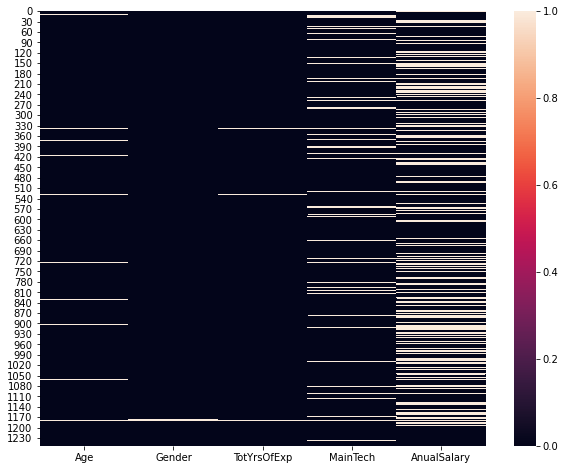

In [14]:
# Biểu đồ xem nan trong dataframe
plt.figure(figsize=(10, 8))
sns.heatmap(df.isna())
plt.show()

Kiểm tra những dòng missing nhiều cột xóa nó đi. 

In [15]:
# Các điểm dữ liệu missing tất cả các cột
nan_many = df[df['Age'].isna() & df['TotYrsOfExp'].isna() & df['MainTech'].isna() & df['AnualSalary'].isna()]
print(nan_many.shape)
nan_many

(4, 5)


,Age,Gender,TotYrsOfExp,MainTech,AnualSalary
473,NaN,NaN,NaN,NaN,NaN
1180,NaN,NaN,NaN,NaN,NaN
1181,NaN,NaN,NaN,NaN,NaN
1231,NaN,NaN,NaN,NaN,NaN


In [16]:
# Xóa bỏ các điểm dữ liệu trên
df.drop(index=nan_many.index, inplace=True)
df = df.reset_index(drop=True)
df[df['Age'].isna() & df['TotYrsOfExp'].isna() & df['MainTech'].isna() & df['AnualSalary'].isna()]

,Age,Gender,TotYrsOfExp,MainTech,AnualSalary



#### Xử lý column TotYrsOfExp

**Xử lý invalid data**

In [17]:
# Kiểm tra dữ liệu thuộc tính TotYrsOfExp
df.TotYrsOfExp.unique()

array(['5', '7', '12', '4', '17', '6', '8', '15', '2', '25', nan, '14',
       '11', '18', '13', '30', '10', '3', '40', '26', '23', '9', '19',
       '20', '5.5', '22', '16', '0.8', '1', '1.5', '6.5', '21', '7.5',
       '2.5', '28', '29', '1,5', '24', '0', '4.5', '27',
       '1 (as QA Engineer) / 11 in total', '2,5', '15, thereof 8 as CTO',
       '31', '6 (not as a data scientist, but as a lab scientist)', '383',
       '3.5', 'less than year'], dtype=object)

In [18]:
# Thay dấu "," thành dấu "."
df.TotYrsOfExp = df['TotYrsOfExp'].str.strip()
df.TotYrsOfExp = df['TotYrsOfExp'].str.replace(',', '.')
df.TotYrsOfExp.unique()

array(['5', '7', '12', '4', '17', '6', '8', '15', '2', '25', nan, '14',
       '11', '18', '13', '30', '10', '3', '40', '26', '23', '9', '19',
       '20', '5.5', '22', '16', '0.8', '1', '1.5', '6.5', '21', '7.5',
       '2.5', '28', '29', '24', '0', '4.5', '27',
       '1 (as QA Engineer) / 11 in total', '15. thereof 8 as CTO', '31',
       '6 (not as a data scientist. but as a lab scientist)', '383',
       '3.5', 'less than year'], dtype=object)

In [19]:
# Những vị trí sai số năm kinh nghiệm
iter = df.loc[df.TotYrsOfExp.str.len() > 4]
iter

,Age,Gender,TotYrsOfExp,MainTech,AnualSalary
804,34.0,Female,1 (as QA Engineer) / 11 in total,Python,36000.0
854,36.0,Male,15. thereof 8 as CTO,Java & PHP,120000.0
1088,31.0,Male,6 (not as a data scientist. but as a lab scien...,Python,NaN
1206,24.0,Female,less than year,"Python, database technologies",NaN


In [20]:
# Gán trực tiếp dành cho dữ liệu sai ít
# df.loc[df['TotYrsOfExp'].str.len() > 4, 'TotYrsOfExp'] = np.array([11, 15, 6, 0])

In [21]:
# Hàm xử lý invalid data.
def fixing(datum):
  if (not isinstance(datum, str) and math.isnan(datum)): # Nếu nó là nan
    return np.nan
  elif len(str(datum)) > 4: 
    results = [e for e in re.split(r'[^0-9]', datum) if e != ''] # Chuỗi xác định những cái ko phải số.
    if len(results) == 0:
      return 0
    return max(map(int, results))
  return datum

**Hàm fixing:** Nhận các giá trị qua phương thức apply, xử lý rồi trả về giá trị đã xử lý ngay tại điểm data đó.

In [22]:
# Apply trên tất cả các điểm dữ liệu trên cột
df['TotYrsOfExp'].apply(fixing)

0        5
1        7
2       12
3        4
4       17
        ..
1244     9
1245    10
1246    15
1247     7
1248     2
Name: TotYrsOfExp, Length: 1249, dtype: object

In [23]:
# Gán lại để cột ban đầu
df['TotYrsOfExp'] = df['TotYrsOfExp'].apply(fixing)

In [24]:
# Kiểm tra
df['TotYrsOfExp'].unique()

array(['5', '7', '12', '4', '17', '6', '8', '15', '2', '25', nan, '14',
       '11', '18', '13', '30', '10', '3', '40', '26', '23', '9', '19',
       '20', '5.5', '22', '16', '0.8', '1', '1.5', '6.5', '21', '7.5',
       '2.5', '28', '29', '24', '0', '4.5', '27', 11, 15, '31', 6, '383',
       '3.5', 0], dtype=object)

**Xử lý missing data TotYrsOfExp**

In [25]:
# Xem những điểm missing
df[df['TotYrsOfExp'].isna()]

,Age,Gender,TotYrsOfExp,MainTech,AnualSalary
12,NaN,NaN,NaN,PHP,NaN
55,NaN,Male,NaN,PHP,NaN
237,32.0,Male,NaN,Ruby,NaN
340,NaN,Male,NaN,NaN,60000.0
450,48.0,Male,NaN,"Computer Networking, Network Security",NaN
454,33.0,Male,NaN,Java,78000.0
468,31.0,Female,NaN,NaN,NaN
529,NaN,Male,NaN,JavaScript,NaN
701,37.0,Male,NaN,C#,NaN
873,31.0,Male,NaN,Python,NaN


In [26]:
# Kiểm tra số lượng missing
df[df['TotYrsOfExp'].isna()].shape

(12, 5)

In [27]:
# Tính mean của column TotYrsExp
mean = np.nanmean(df.TotYrsOfExp.astype('float'))
print(mean)

# Thay thế mean cho nan
df.TotYrsOfExp.fillna(mean, inplace=True)

9.057073565076799


In [28]:
# Kiểm tra lại
df.TotYrsOfExp.unique()

array(['5', '7', '12', '4', '17', '6', '8', '15', '2', '25',
       9.057073565076799, '14', '11', '18', '13', '30', '10', '3', '40',
       '26', '23', '9', '19', '20', '5.5', '22', '16', '0.8', '1', '1.5',
       '6.5', '21', '7.5', '2.5', '28', '29', '24', '0', '4.5', '27', 11,
       15, '31', 6, '383', '3.5', 0], dtype=object)

**Format về đúng kiểu dữ liệu**
- Xử lý dữ liệu bị sai(invalid data) trước, xử lý nan trước --> Formatting

In [29]:
# Chuyển data về dạng số. 
df['TotYrsOfExp'] = pd.to_numeric(df['TotYrsOfExp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1226 non-null   float64
 1   Gender       1243 non-null   object 
 2   TotYrsOfExp  1249 non-null   float64
 3   MainTech     1126 non-null   object 
 4   AnualSalary  885 non-null    float64
dtypes: float64(3), object(2)
memory usage: 48.9+ KB


**Kiểm tra và xử lý outliers**

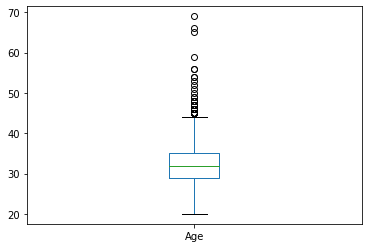

In [30]:
# Biểu đồ xem outliers data
df['Age'].plot(kind='box')

In [31]:
# Hàm trả về râu dưới và râu trên
def bound(x):
  q3, q1 = np.quantile(x, 0.75), np.quantile(x, 0.25)
  IQR = q3 - q1
  return [q1 - 1.5*IQR, q3 + 1.5*IQR]

In [32]:
df['TotYrsOfExp'].describe()

count    1249.000000
mean        9.057074
std        11.820148
min         0.000000
25%         5.000000
50%         8.000000
75%        12.000000
max       383.000000
Name: TotYrsOfExp, dtype: float64

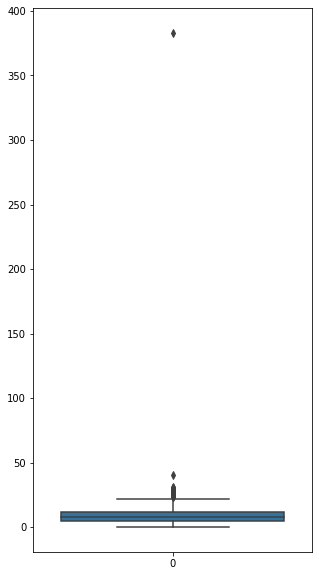

In [33]:
# Biểu đồ hộp trên TotYrsOfExp
plt.figure(figsize=(5, 10))
sns.boxplot(data=df['TotYrsOfExp'])
plt.show()

In [34]:
# Kiểm tra dữ liệu outliers
upper = bound(df['TotYrsOfExp'])[1]
df[df['TotYrsOfExp'] > upper] 

# Khám phá 

,Age,Gender,TotYrsOfExp,MainTech,AnualSalary
11,NaN,Male,25.0,C++,80000.0
23,59.0,Male,30.0,Java,69000.0
45,48.0,Male,25.0,Java,75000.0
59,66.0,Male,40.0,ruby on rails,50000.0
67,45.0,Male,26.0,C#,93000.0
68,48.0,Male,23.0,Google Cloud Platform,NaN
173,40.0,Male,25.0,Swift,72000.0
292,45.0,Male,25.0,c++,73000.0
296,65.0,Male,25.0,"Pascal, VB.NET, C#",50000.0
369,44.0,Male,28.0,C#,78500.0


In [35]:
# Số dòng, cột outliers
df[df['TotYrsOfExp'] > upper].shape

(22, 5)

In [36]:
# Tính số lần xuất hiện của một giá  trị
df['TotYrsOfExp'].value_counts()

10.000000     138
5.000000      136
6.000000      100
8.000000       92
7.000000       84
4.000000       80
12.000000      67
3.000000       66
15.000000      64
9.000000       60
2.000000       57
11.000000      44
13.000000      41
14.000000      39
1.000000       31
20.000000      28
16.000000      20
18.000000      16
17.000000      12
9.057074       12
19.000000       7
25.000000       7
0.000000        7
2.500000        5
22.000000       5
1.500000        4
30.000000       4
21.000000       3
23.000000       2
0.800000        2
3.500000        2
27.000000       2
4.500000        2
24.000000       1
31.000000       1
26.000000       1
29.000000       1
40.000000       1
28.000000       1
383.000000      1
7.500000        1
6.500000        1
5.500000        1
Name: TotYrsOfExp, dtype: int64

In [37]:
# Gán lại vị trí lỗi
df.loc[df['TotYrsOfExp'] == df['TotYrsOfExp'].max(), 'TotYrsOfExp'] = 10
df['TotYrsOfExp'].max()

40.0

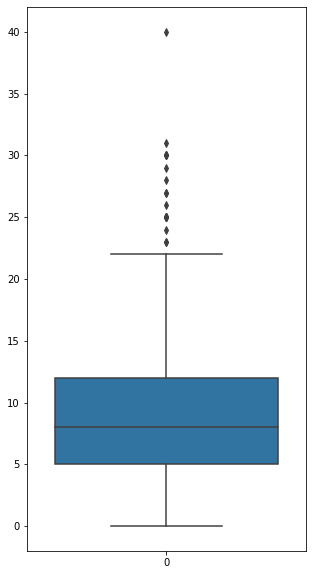

In [38]:
# Check lại biểu đồ
plt.figure(figsize=(5, 10))
sns.boxplot(data=df['TotYrsOfExp'])
plt.show()

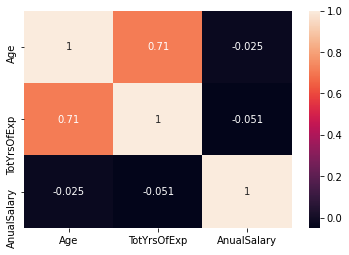

In [39]:
# Xem qua một tí về biểu đồ tương quan
corr = df.corr()
sns.heatmap(data=corr, annot=True)
plt.show()

####Xử lý trên column Age

Cột tuổi thì không có dữ liệu bị lỗi.

In [40]:
# Kiểm dữ liệu
df['Age'].dtype

dtype('float64')

In [41]:
# Các giá trị có trong cột Age
df['Age'].unique()

array([26., 29., 28., 37., 32., 24., 35., nan, 34., 31., 41., 27., 25.,
       59., 36., 38., 40., 39., 33., 30., 49., 48., 44., 66., 45., 43.,
       42., 46., 47., 56., 53., 65., 22., 23., 50., 51., 21., 20., 54.,
       69., 52.])

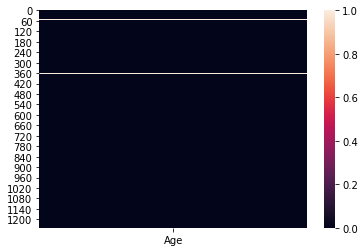

In [42]:
# Biểu đồ xem nan
sns.heatmap(df[['Age']].isna())

In [43]:
# Liệt kê các điểm dữ liệu missing
nan_age = df[df['Age'].isna()]
print(nan_age.shape)
nan_age

(23, 5)


,Age,Gender,TotYrsOfExp,MainTech,AnualSalary
11,NaN,Male,25.000000,C++,80000.0
12,NaN,NaN,9.057074,PHP,NaN
28,NaN,Male,14.000000,NaN,65000.0
55,NaN,Male,9.057074,PHP,NaN
113,NaN,Male,6.000000,Javascript,45000.0
300,NaN,Male,7.500000,SQL,48000.0
330,NaN,NaN,2.000000,Python,54000.0
340,NaN,Male,9.057074,NaN,60000.0
365,NaN,Male,9.000000,Java,NaN
374,NaN,Male,8.000000,Python,70400.0


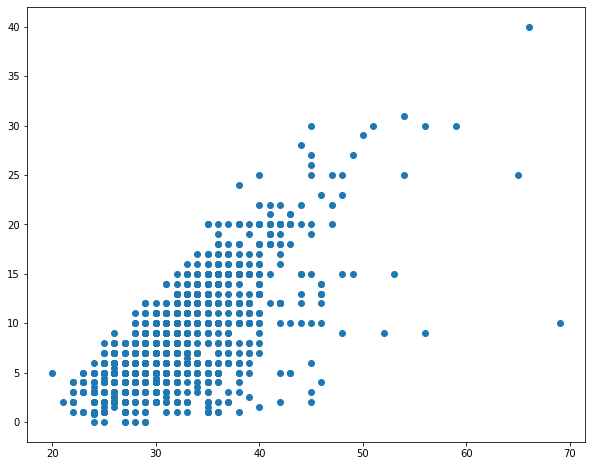

In [44]:
# Biểu đô tương quan 2 biến
plt.figure(figsize=(10, 8))
plt.scatter(df['Age'], df['TotYrsOfExp'])
plt.show()

In [45]:
# Lấy các giá trị cần dự đoán
bePre = df[df['Age'].isna()][['TotYrsOfExp']].values
bePre, bePre.shape

(array([[25.        ],
        [ 9.05707357],
        [14.        ],
        [ 9.05707357],
        [ 6.        ],
        [ 7.5       ],
        [ 2.        ],
        [ 9.05707357],
        [ 9.        ],
        [ 8.        ],
        [ 4.        ],
        [15.        ],
        [ 9.05707357],
        [18.        ],
        [10.        ],
        [11.        ],
        [12.        ],
        [ 1.        ],
        [10.        ],
        [ 4.        ],
        [15.        ],
        [ 5.        ],
        [10.        ]]), (23, 1))

In [46]:
# Dữ liệu cho mô hình học (không chưa nan)
X = df[~df['Age'].isna()][['TotYrsOfExp']].values
y = df[~df['Age'].isna()]['Age'].values
X.shape, y.shape

((1226, 1), (1226,))

**Mô hình linear**: Age = a*SoNamKinhNghiem + b

In [47]:
# Thực thi mô hình 
model = LinearRegression().fit(X, y)
print(model.score(X, y))

# Dự đoán cho vị trí nan
predict = model.predict(bePre)
predict

0.5053407094395717


array([44.97753346, 32.75210427, 36.54246217, 32.75210427, 30.40786487,
       31.55810186, 27.34056622, 32.75210427, 32.70833886, 31.94151419,
       28.87421554, 37.30928683, 32.75210427, 39.60976082, 33.47516352,
       34.24198818, 35.00881284, 26.57374155, 33.47516352, 28.87421554,
       37.30928683, 29.6410402 , 33.47516352])

In [48]:
# Thay giá trị được dự đoán vào data nan của Age
nan_index = df[df['Age'].isna()].index
df.loc[nan_index, 'Age'] = predict

# Kiểm tra nan trong Age
df[df['Age'].isna()]

,Age,Gender,TotYrsOfExp,MainTech,AnualSalary


#### Kiểm tra và xử lý outliers của Age:

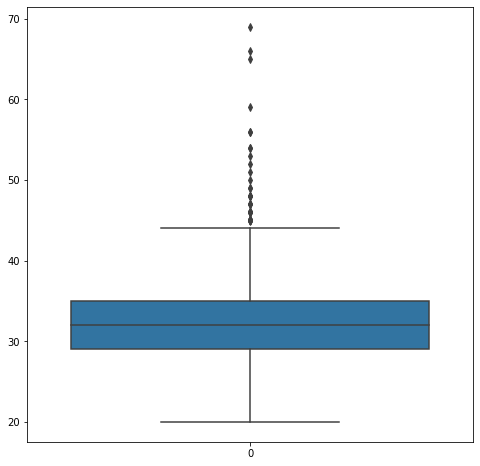

In [49]:
# Biểu đồ xem outliers
plt.figure(figsize=(8, 8))
sns.boxplot(data=df['Age'])
plt.show()

Phần này chọn cách giữ nguyên. Các bạn có thể thử thêm các cách khác và xem thử độ chính xác mô hình có tăng lên không.

In [50]:
# Xem các giá trị ngoại lệ.
upper = bound(df['Age'])[1]
df[df['Age'] > upper]

,Age,Gender,TotYrsOfExp,MainTech,AnualSalary
11,44.977533,Male,25.000000,C++,80000.0
23,59.000000,Male,30.000000,Java,69000.0
41,49.000000,Male,15.000000,Java,66000.0
45,48.000000,Male,25.000000,Java,75000.0
59,66.000000,Male,40.000000,ruby on rails,50000.0
67,45.000000,Male,26.000000,C#,93000.0
68,48.000000,Male,23.000000,Google Cloud Platform,NaN
169,46.000000,Male,4.000000,NaN,78000.0
174,46.000000,Male,13.000000,Java,70000.0
181,46.000000,Male,14.000000,JavaScript,63000.0


In [51]:
df[df['Age'] > upper].shape

(41, 5)

####Xử lý column MainTech

In [52]:
df['MainTech']

0                    TypeScript
1                          Ruby
2       Javascript / Typescript
3                    Javascript
4                       C# .NET
                 ...           
1244                       Java
1245          consumer analysis
1246                        PHP
1247                 JavaScript
1248                       yaml
Name: MainTech, Length: 1249, dtype: object

In [53]:
# dict những tên công nghệ cần thay thế về 1 tên chung. (jS --> javasript, k8s --> kubernetes, ...)
dict_apply_duplicate = {
    r'js': 'javascript',
    r'k8s': 'kubernetes',
    r'kubrrnetes': 'kubernetes',
    r'gcp': 'google cloud platform',
    r'\.net': '.net',
    r'[^\w](\.net)': '.net core',
    'core core': 'core',
    r'frontend:': 'frontend,',
    r'react': 'react.js',
    r'reactjs': 'react.js',
    r'nodejs': 'node.js',
    r'node': 'node.js',
    r'ts': 'typescript',
    r'[\(\)]': ''
}


def doing(data: str):
    deprecated = ['none', '-', '--', 'nothing'] # list những cái giá trị bỏ
    # dưới đây là if data là nan hoặc data nằm trong list những cái bỏ thì mình trả về no_tech
    if (not isinstance(data, str) and math.isnan(data)) or (data in deprecated):
        return ['no_tech']
    
    data = data.lower() # lowercase dữ liệu chuỗi
    # gọi cái dict ở trên
    # thay thế key bằng value có dấu , hai đầu để tiện split
    global dict_apply_duplicate
    for regex, sub in dict_apply_duplicate.items(): # Thay thế các chuỗi viết tắt thành tên đầy đủ theo value của dict
        sub_data = ',%s,' % (sub)
        data = re.compile(regex).sub(sub_data, data)
    
    data = data.replace('/', ',') # thay dấu / thành ,
    data = data.split(',') # split công nghệ theo ,
    data = [datum.strip() for datum in data] # loại bỏ space hai đầu của từng công nghệ
    data = [datum for datum in data if datum != ''] # nếu loại bỏ xong là rỗng thì không lấy 
    data = ['_'.join(datum.split()) for datum in data] # ghép lại theo _
    
    if data == ['aws_hadoop_postgre_typescript']: # đối với trường hợp cụ thể như thế này thì thay thế riêng
        data = data[0].split('_')
        
    return data

**Hàm doing:** Input là các giá trị của cột MainTech thông qua phương thức apply. Xử lý rồi trả về giá trị ngay tại điểm dữ liệu đó.

1. Kiểm tra nếu trong list deprecated hoặc là nan gán "no_tech".
2. Lower case cả chuỗi về chữ thường.
3. Thay thế các chuỗi viết tắt thành tên đầy đủ theo value của dict_apply_duplicate.
4. Thay dấu "/" thành ",".
5. Tách chuỗi theo dấu ","
6. Loại bỏ khoảng trằng " " có ở 2 đầu (vd : " python  ").
7. Loại bỏ các giá trị "".
8. Ghép tên các công nghệ trên 2 từ bởi "_".
9. Trường hợp chuỗi "aws_hadoop_postgre_typescript" phải tách ra thành các công nghệ riêng biệt.
10. Trả về data đã xử lý.


In [54]:
# Apply trên các điểm dữ liệu
df['MainTech'] = df['MainTech'].apply(doing)

In [55]:
# Show kết quả
df['MainTech']

0                   [typescript]
1                         [ruby]
2       [javascript, typescript]
3                   [javascript]
4                [c#, .net_core]
                  ...           
1244                      [java]
1245         [consumer_analysis]
1246                       [php]
1247                [javascript]
1248                      [yaml]
Name: MainTech, Length: 1249, dtype: object

####Xử lý column AnualSalary

In [56]:
# Kiểm tra dữ liệu lỗi
print(type(df['AnualSalary']))
df['AnualSalary'].unique()

<class 'pandas.core.series.Series'>


array([7.5000e+04, 8.2000e+04, 1.0000e+05,        nan, 6.2000e+04,
       7.6000e+04, 6.5000e+04, 5.5000e+04, 9.0000e+04, 5.2500e+04,
       8.0000e+04, 6.6000e+04, 5.8000e+04, 9.2000e+04, 6.9000e+04,
       6.3000e+04, 4.4000e+04, 7.8000e+04, 8.1000e+04, 3.7000e+04,
       7.2000e+04, 9.6000e+04, 5.4000e+04, 5.2000e+04, 6.0000e+04,
       6.8000e+04, 5.0000e+04, 5.6000e+04, 7.0000e+04, 8.5000e+04,
       9.3000e+04, 4.2000e+04, 5.3000e+04, 7.9000e+04, 6.2400e+04,
       7.3000e+04, 4.5000e+04, 6.1000e+04, 7.2500e+04, 7.7000e+04,
       1.1000e+05, 3.6000e+04, 6.7000e+04, 6.8500e+04, 6.7500e+04,
       5.7000e+04, 1.1500e+05, 8.8000e+04, 1.3200e+05, 1.0500e+05,
       5.7600e+04, 5.6500e+04, 4.8000e+04, 4.7000e+04, 9.7000e+04,
       9.8000e+04, 5.3300e+04, 2.1800e+04, 1.0800e+05, 7.4000e+04,
       8.0600e+04, 1.2000e+05, 6.4000e+04, 8.2240e+04, 4.3000e+04,
       5.6400e+04, 1.7000e+04, 4.6000e+04, 4.3200e+04, 5.9000e+04,
       5.4500e+04, 7.8500e+04, 6.1500e+04, 7.0400e+04, 2.0000e

In [57]:
df['AnualSalary'].dtype

dtype('float64')

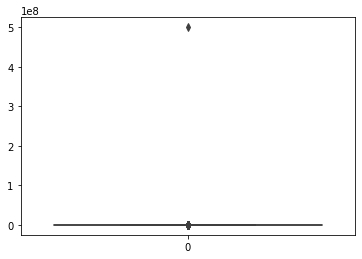

In [58]:
# Xem outliers
sns.boxplot(data=df['AnualSalary'])

In [59]:
# Xem các outliers
l = df[df['AnualSalary'].notna()]['AnualSalary']
upper = bound(l)[1]
df[df['AnualSalary'] > upper]

,Age,Gender,TotYrsOfExp,MainTech,AnualSalary
131,34.0,Male,17.0,[java],110000.0
186,31.0,Male,10.0,[python],115000.0
192,35.0,Male,13.0,[pegasystems_platform],132000.0
255,39.0,Male,12.0,[php],108000.0
272,41.0,Male,19.0,[autonomous_driving],120000.0
279,39.0,Male,10.0,[no_tech],120000.0
392,37.0,Male,20.0,[no_tech],125000.0
490,37.0,Male,18.0,[go],156000.0
493,39.0,Male,11.0,[python],130000.0
527,39.0,Male,20.0,[embedded],118000.0


In [60]:
# Khám phá một tí về mức lương
df[df['AnualSalary'] > 163500]

,Age,Gender,TotYrsOfExp,MainTech,AnualSalary
629,40.0,Male,20.0,[swift],230000.0
657,31.0,Male,5.0,[no_tech],760000.0
836,26.0,Male,5.0,[spark],190000.0
852,29.0,Female,1.0,[julia],500000000.0
957,36.0,Male,15.0,[c++],169000.0
965,35.0,Male,6.0,[java],200000.0
1220,45.0,Male,20.0,"[.net_core, c++, spss, embeddded]",200000.0


In [61]:
# Thể các giá trị ngoài lệ phía trên bằng trung bình
df = df[df['AnualSalary'] != df['AnualSalary'].max()]
df['AnualSalary'].max()

760000.0

In [62]:
# Xem dữ liệu nan
df[df['AnualSalary'].isna()]

,Age,Gender,TotYrsOfExp,MainTech,AnualSalary
3,28.000000,Male,4.000000,[javascript],NaN
6,37.000000,Male,6.000000,[javascript],NaN
12,32.752104,NaN,9.057074,[php],NaN
13,34.000000,Male,14.000000,[typescript],NaN
22,25.000000,Male,5.000000,[javascript],NaN
...,...,...,...,...,...
1228,52.000000,Male,9.057074,[atlassian_jira],NaN
1230,26.000000,Male,5.000000,[python],NaN
1231,26.000000,Male,5.000000,[python],NaN
1234,27.000000,Male,3.000000,[qlik],NaN


In [63]:
# Điền nan bằng trung bình
mean = df['AnualSalary'].mean()
df['AnualSalary'].fillna(mean, inplace=True)

In [64]:
df[df['AnualSalary'].isna()]

,Age,Gender,TotYrsOfExp,MainTech,AnualSalary


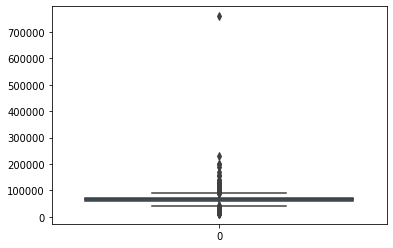

In [65]:
sns.boxplot(data=df['AnualSalary'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


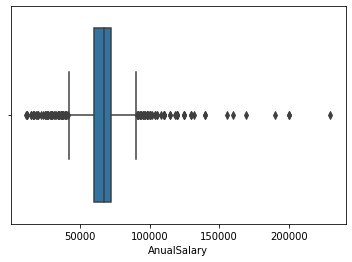

In [66]:
df = df[df['AnualSalary'] != df['AnualSalary'].max()]
sns.boxplot(df['AnualSalary'])

Ngoài các cách xử lý trên còn có : forward fill, back fill dùng cho timeseries data. --> [Document](https://www.oreilly.com/library/view/learning-pandas/9781787123137/82b10237-8e03-414f-a9aa-b52316f78976.xhtml)

##Binning
Tạo thêm data phục vụ cho việc phân tích dữ liệu.

**Bạn có thể tham khảo thêm: -->** [Doc](https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950)

Binning và explore cho column Age

In [67]:
# #Tạo nhãn và khoảng bins
labels_age = ['Nguoi tre', 'Trung nien', 'Gia']
bins_age = [0, 30, 45, 70]

# #Tạo column bins
df['Age_bins'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age)
df['Age_bins']

0        Nguoi tre
1        Nguoi tre
2        Nguoi tre
3        Nguoi tre
4       Trung nien
           ...    
1244    Trung nien
1245    Trung nien
1246    Trung nien
1247     Nguoi tre
1248     Nguoi tre
Name: Age_bins, Length: 1247, dtype: category
Categories (3, object): ['Nguoi tre' < 'Trung nien' < 'Gia']

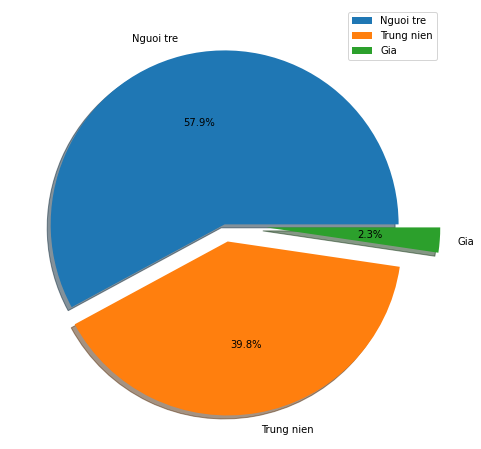

In [68]:
# # Khám phá thông tin
stat = df[['Age_bins']].value_counts()[:]
explode = (0, 0.1, 0.24)

plt.figure(figsize=(10, 8))
plt.pie(stat, explode=explode, labels=labels_age, autopct='%1.1f%%', shadow=True)
plt.legend()
plt.show()

Binning và explore cho column AnualSalary

In [69]:
#Tạo khoảng và nhãn bins
labels_salary = ['0 - 20.000', '20.000 - 40.000', '40.000 - 80.000', '80.000 ++']
range_salary = [0, 20000, 40000, 80000, df['AnualSalary'].max()]

#Tạo columns bins
df['Salary_bins'] = pd.cut(df['AnualSalary'], bins=range_salary, labels=labels_salary)
df['Salary_bins']

0       40.000 - 80.000
1             80.000 ++
2             80.000 ++
3       40.000 - 80.000
4       40.000 - 80.000
             ...       
1244    40.000 - 80.000
1245    40.000 - 80.000
1246          80.000 ++
1247    20.000 - 40.000
1248    20.000 - 40.000
Name: Salary_bins, Length: 1247, dtype: category
Categories (4, object): ['0 - 20.000' < '20.000 - 40.000' < '40.000 - 80.000' < '80.000 ++']

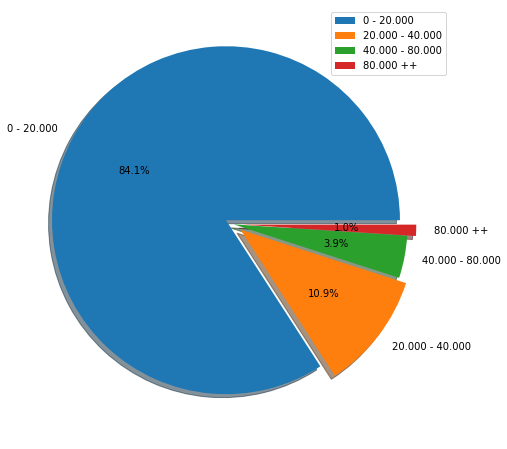

In [70]:
# #Khám phá thông tin
stat = df[['Salary_bins']].value_counts()[:]
explode = (0.05, 0.05, 0, 0.05)

plt.figure(figsize=(10, 8))
plt.pie(stat, explode=explode, labels=labels_salary, autopct='%1.1f%%', shadow=True)
plt.legend()
plt.show()

In [71]:
#Tạo khoảng và nhãn bins
labels_exp = ['Gà Mờ', 'Gà Gà', 'Gà Trống', 'Gà Đầu Đàn', 'Gà Già Đầu']
range_exp = [0, 3, 7, 15, 30, df['TotYrsOfExp'].max()]

#Tạo columns bins
df['exp_bins'] = pd.cut(df['TotYrsOfExp'], bins=range_exp, labels=labels_exp)
df['exp_bins']

0            Gà Gà
1            Gà Gà
2         Gà Trống
3            Gà Gà
4       Gà Đầu Đàn
           ...    
1244      Gà Trống
1245      Gà Trống
1246      Gà Trống
1247         Gà Gà
1248         Gà Mờ
Name: exp_bins, Length: 1247, dtype: category
Categories (5, object): ['Gà Mờ' < 'Gà Gà' < 'Gà Trống' < 'Gà Đầu Đàn' < 'Gà Già Đầu']

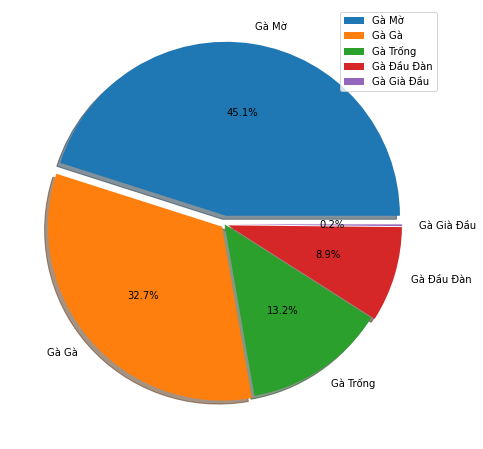

In [72]:
#Khám phá thông tin
stat = df[['exp_bins']].value_counts()[:]
explode = (0.05, 0.02, 0, 0.02, 0.02)

plt.figure(figsize=(10, 8))
plt.pie(stat, explode=explode, labels=labels_exp, autopct='%1.1f%%', shadow=True)
plt.legend()
plt.show()

In [73]:
# Drop những cột tạo từ bước Binning
df = df.drop(columns=['exp_bins', 'Salary_bins', 'Age_bins'])
df

,Age,Gender,TotYrsOfExp,MainTech,AnualSalary
0,26.0,Male,5.0,[typescript],75000.000000
1,26.0,Male,7.0,[ruby],82000.000000
2,29.0,Male,12.0,"[javascript, typescript]",100000.000000
3,28.0,Male,4.0,[javascript],67350.222851
4,37.0,Male,17.0,"[c#, .net_core]",62000.000000
...,...,...,...,...,...
1244,31.0,Male,9.0,[java],70000.000000
1245,33.0,Male,10.0,[consumer_analysis],48000.000000
1246,39.0,Male,15.0,[php],90000.000000
1247,26.0,Male,7.0,[javascript],33800.000000


##Data Normalization
Chuẩn hóa dữ liệu làm cho các thuộc tính có cùng một đơn vị. Việc này giúp cho các thuộc tính có cùng một trọng số khi đưa vào mô hình. Để làm feature input cho một thuật toán thì nên áp dụng cùng một phương pháp normalization cho tất cả các feature. 

In [74]:
# Normalization column định lượng: (Simple feature scaling)
df['Age'] = df['Age']/df['Age'].max()
df['TotYrsOfExp'] = df['TotYrsOfExp']/df['TotYrsOfExp'].max()
df['AnualSalary'] = df['AnualSalary']/df['AnualSalary'].max()
df[['Age', 'TotYrsOfExp', 'AnualSalary']]

,Age,TotYrsOfExp,AnualSalary
0,0.376812,0.125,0.326087
1,0.376812,0.175,0.356522
2,0.420290,0.300,0.434783
3,0.405797,0.100,0.292827
4,0.536232,0.425,0.269565
...,...,...,...
1244,0.449275,0.225,0.304348
1245,0.478261,0.250,0.208696
1246,0.565217,0.375,0.391304
1247,0.376812,0.175,0.146957


**Bạn có thể tham khảo thêm các cách khác ở đây: -->** [Document](https://www.geeksforgeeks.org/data-normalization-with-pandas/)

##Label encoder
Bước này chuyển dữ liệu định tính --> dữ liệu dạng số để model có thể học được.

####Label encode column Gender
**Chuyển Male --> 1, Female --> 0, Diverser --> 2. Đây là phương pháp label encode.** 


In [75]:
def encode(datum):
  if (datum == 'Male') | (not isinstance(datum, str) and math.isnan(datum)) | (datum == 'nan'):
    return 1
  if (datum == 'Diverse'):
    return 2
  return 0

In [76]:
# Apply trên các giá trị cột
df['Gender'] = df['Gender'].apply(encode)

# Kiểm tra lại
df['Gender'].unique()

array([1, 0, 2])

####One-hot encode column MainTech
Tạo các cột với tên là công nghệ được sử dụng. Nếu một ngừoi có sử dụng thì mang giá trị 1 và ngược lại là 0. Đây là phương pháp One-hot encode bạn có thể search gg để hiểu thêm.

In [77]:
df['MainTech']

0                   [typescript]
1                         [ruby]
2       [javascript, typescript]
3                   [javascript]
4                [c#, .net_core]
                  ...           
1244                      [java]
1245         [consumer_analysis]
1246                       [php]
1247                [javascript]
1248                      [yaml]
Name: MainTech, Length: 1247, dtype: object

In [78]:
threshold = 7
list_tech = list()
for i in df['MainTech']:
    for j in i:
        if j: # tránh những trường hợp ''
            list_tech.append(j)

counter = pd.DataFrame(Counter(list_tech).items(), columns=['name', 'count']).sort_values(by='count', ascending=False)
counter

,name,count
7,python,232
10,java,213
2,javascript,136
14,no_tech,126
9,php,75
...,...,...
77,web_apps,1
76,python_+_sql,1
73,several,1
72,linux_kernel,1


In [79]:
counter[counter['count'] >= threshold] 

,name,count
7,python,232
10,java,213
2,javascript,136
14,no_tech,126
9,php,75
0,typescript,54
13,c++,52
3,c#,38
15,kotlin,33
28,scala,32


In [80]:
one_hot_column = counter[counter['count'] >= threshold]['name'].values
foo = [] 
one_hot_list = []
for idx, row in enumerate(df['MainTech']):
    flag = True
    one_row = {'MainTech.{}'.format(tech): 1 if tech in row else 0 for tech in one_hot_column}
    for key, val in one_row.items():
      flag &= val == 0
    if flag:
      foo.append(idx)
    one_hot_list.append(one_row)
    
main_tech_one_hot_df = pd.DataFrame(one_hot_list)
main_tech_one_hot_df

,MainTech.python,MainTech.java,MainTech.javascript,MainTech.no_tech,MainTech.php,MainTech.typescript,MainTech.c++,MainTech.c#,MainTech.kotlin,MainTech.scala,MainTech..net_core,MainTech.swift,MainTech.go,MainTech.sql,MainTech.ruby,MainTech.c,MainTech.react.js,MainTech.kubernetes,MainTech.angular,MainTech.ios,MainTech.android,MainTech.node.js,MainTech.aws,MainTech.r,MainTech.abap
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1244,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1245,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
main_tech_one_hot_df.shape

(1247, 25)

In [82]:
# Datafrane cuối cùng, đầu vào của mô hình 
input = pd.concat([df.drop('MainTech', axis=1), main_tech_one_hot_df], axis=1)
input = input.drop(foo).reset_index(drop=True)

In [83]:
input

,Age,Gender,TotYrsOfExp,AnualSalary,MainTech.python,MainTech.java,MainTech.javascript,MainTech.no_tech,MainTech.php,MainTech.typescript,MainTech.c++,MainTech.c#,MainTech.kotlin,MainTech.scala,MainTech..net_core,MainTech.swift,MainTech.go,MainTech.sql,MainTech.ruby,MainTech.c,MainTech.react.js,MainTech.kubernetes,MainTech.angular,MainTech.ios,MainTech.android,MainTech.node.js,MainTech.aws,MainTech.r,MainTech.abap
0,0.376812,1.0,0.125,0.326087,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.376812,1.0,0.175,0.356522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.420290,1.0,0.300,0.434783,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.405797,1.0,0.100,0.292827,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.536232,1.0,0.425,0.269565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,0.550725,1.0,0.450,0.391304,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1134,0.449275,1.0,0.225,0.304348,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1135,0.478261,1.0,0.250,0.208696,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1136,0.376812,1.0,0.175,0.146957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2 phương pháp encode phía trên sẽ có ưu nhược điểm khác nhau khi đưa vào model. -->** [Document tham khảo](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/)

#**Modeling**
+ Mô hình hồi quy ***y = ax + b*** . --> [Document](https://machinelearningcoban.com/2016/12/28/linearregression/)

+ Bước này mình sử dụng thuật toán randomforest dành cho hồi quy. --> [Document](https://gdcoder.com/random-forest-regressor-explained-in-depth/)

In [84]:
# Drop các dòng nan do label encode xong
input = input.dropna().reset_index(drop=True)
input

,Age,Gender,TotYrsOfExp,AnualSalary,MainTech.python,MainTech.java,MainTech.javascript,MainTech.no_tech,MainTech.php,MainTech.typescript,MainTech.c++,MainTech.c#,MainTech.kotlin,MainTech.scala,MainTech..net_core,MainTech.swift,MainTech.go,MainTech.sql,MainTech.ruby,MainTech.c,MainTech.react.js,MainTech.kubernetes,MainTech.angular,MainTech.ios,MainTech.android,MainTech.node.js,MainTech.aws,MainTech.r,MainTech.abap
0,0.376812,1.0,0.125,0.326087,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.376812,1.0,0.175,0.356522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.420290,1.0,0.300,0.434783,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.405797,1.0,0.100,0.292827,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.536232,1.0,0.425,0.269565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.463768,1.0,0.250,0.347826,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1131,0.405797,1.0,0.125,0.239130,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1132,0.550725,1.0,0.450,0.391304,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1133,0.449275,1.0,0.225,0.304348,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# Lấy tập X, y đầu vào mô hình
y = input['AnualSalary']
input = input.drop(columns='AnualSalary')
names = input.columns.to_list()
X = input[names]

# Kiểm tra các cột đầu vào
print(names)

['Age', 'Gender', 'TotYrsOfExp', 'MainTech.python', 'MainTech.java', 'MainTech.javascript', 'MainTech.no_tech', 'MainTech.php', 'MainTech.typescript', 'MainTech.c++', 'MainTech.c#', 'MainTech.kotlin', 'MainTech.scala', 'MainTech..net_core', 'MainTech.swift', 'MainTech.go', 'MainTech.sql', 'MainTech.ruby', 'MainTech.c', 'MainTech.react.js', 'MainTech.kubernetes', 'MainTech.angular', 'MainTech.ios', 'MainTech.android', 'MainTech.node.js', 'MainTech.aws', 'MainTech.r', 'MainTech.abap']


In [86]:
# Dạng input mô hình
X.shape, y.shape

((1135, 28), (1135,))

In [87]:
# Chia dữ liệu thành train test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=3)

Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((908, 28), (227, 28), (908,), (227,))

In [88]:
# Sử dụng mô hình hồi quy tuyến tính của thuật toán randomforest
model = RandomForestRegressor(random_state=3).fit(Xtrain, ytrain)
predict = model.predict(Xtest)

print('Điểm trên tập train : ', model.score(Xtrain, ytrain))
print('Điểm trên tập test :', model.score(Xtest, ytest))

Điểm trên tập train :  0.781511717134368
Điểm trên tập test : 0.0866384473159687
